Top Selling Product Lines
             Product line  Count
0     Fashion accessories    178
1      Food and beverages    174
2  Electronic accessories    170
3       Sports and travel    166
4      Home and lifestyle    160
5       Health and beauty    152


Top Selling Product Lines by Gender
              Product line  Gender  Count
0      Fashion accessories  Female     96
1       Food and beverages  Female     90
2        Health and beauty    Male     88
3        Sports and travel  Female     88
4   Electronic accessories    Male     86
5   Electronic accessories  Female     84
6       Food and beverages    Male     84
7      Fashion accessories    Male     82
8       Home and lifestyle    Male     81
9       Home and lifestyle  Female     79
10       Sports and travel    Male     78
11       Health and beauty  Female     64


Highest Spending by Gender
   Gender  Total Spending
0  Female      167882.925
1    Male      155083.824


Highest Sales per Branch
  Branch  Total Sales
0  

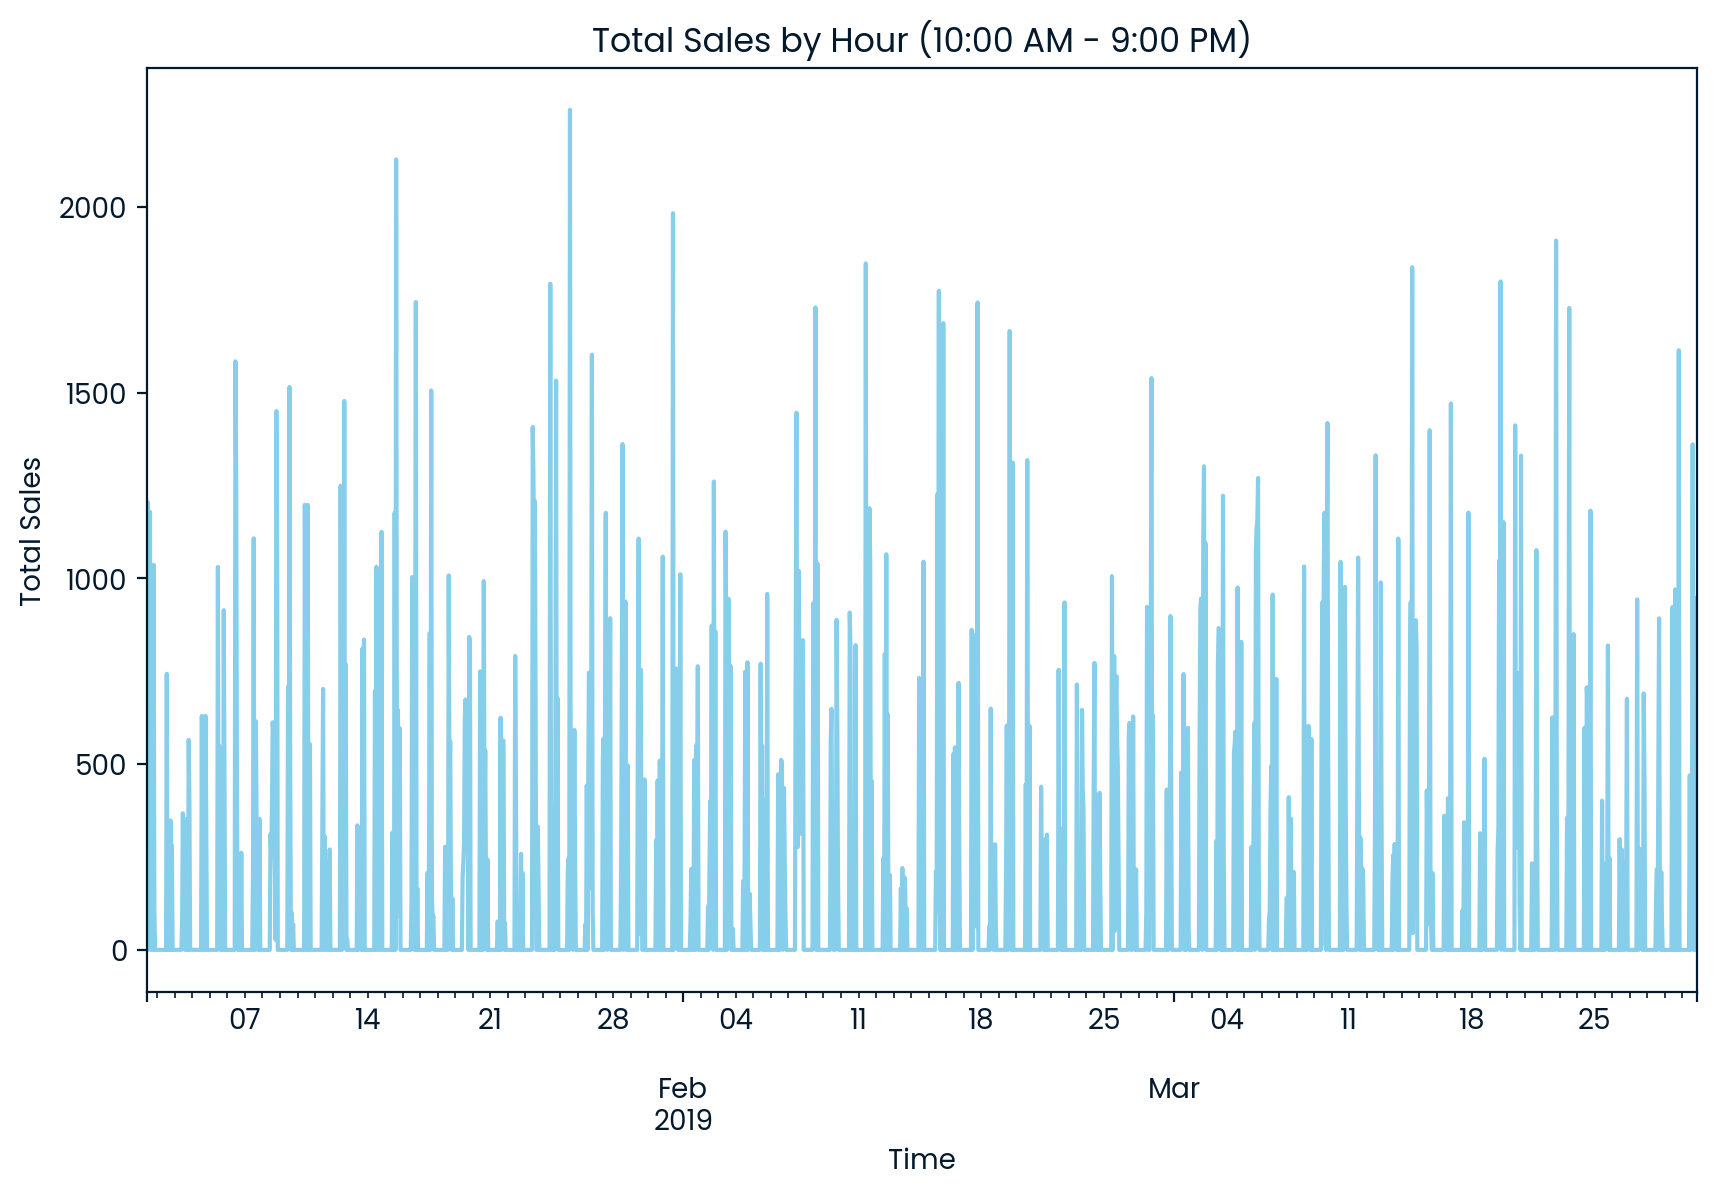

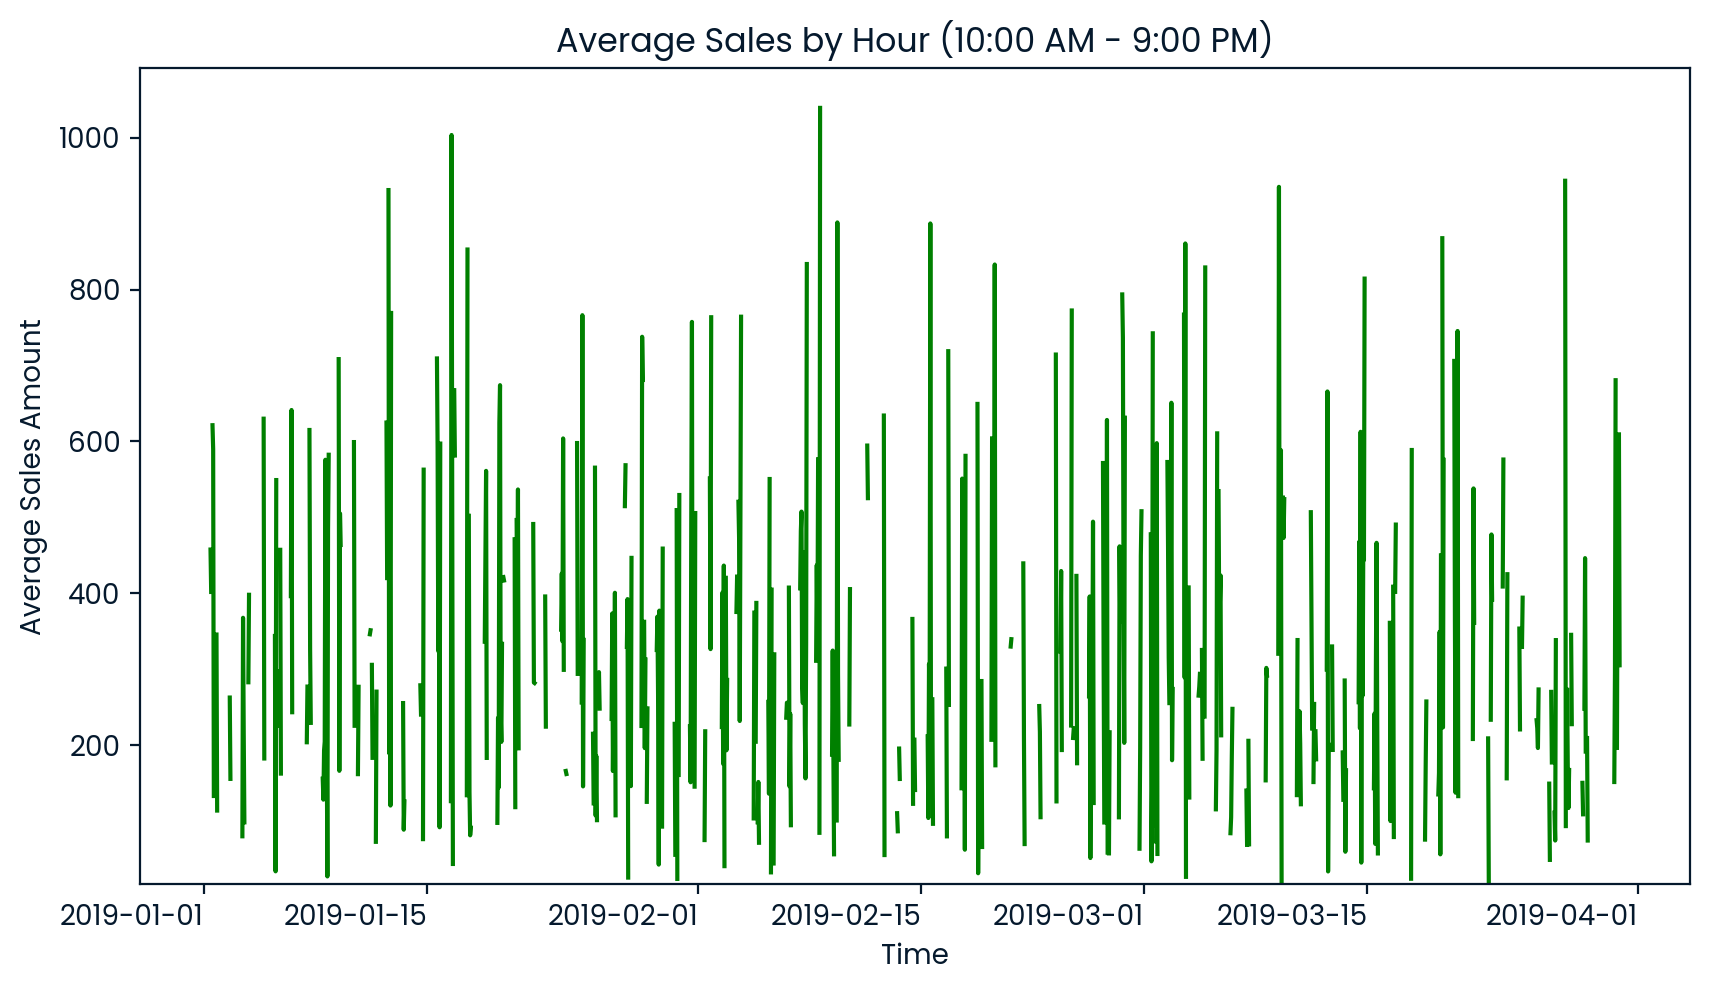

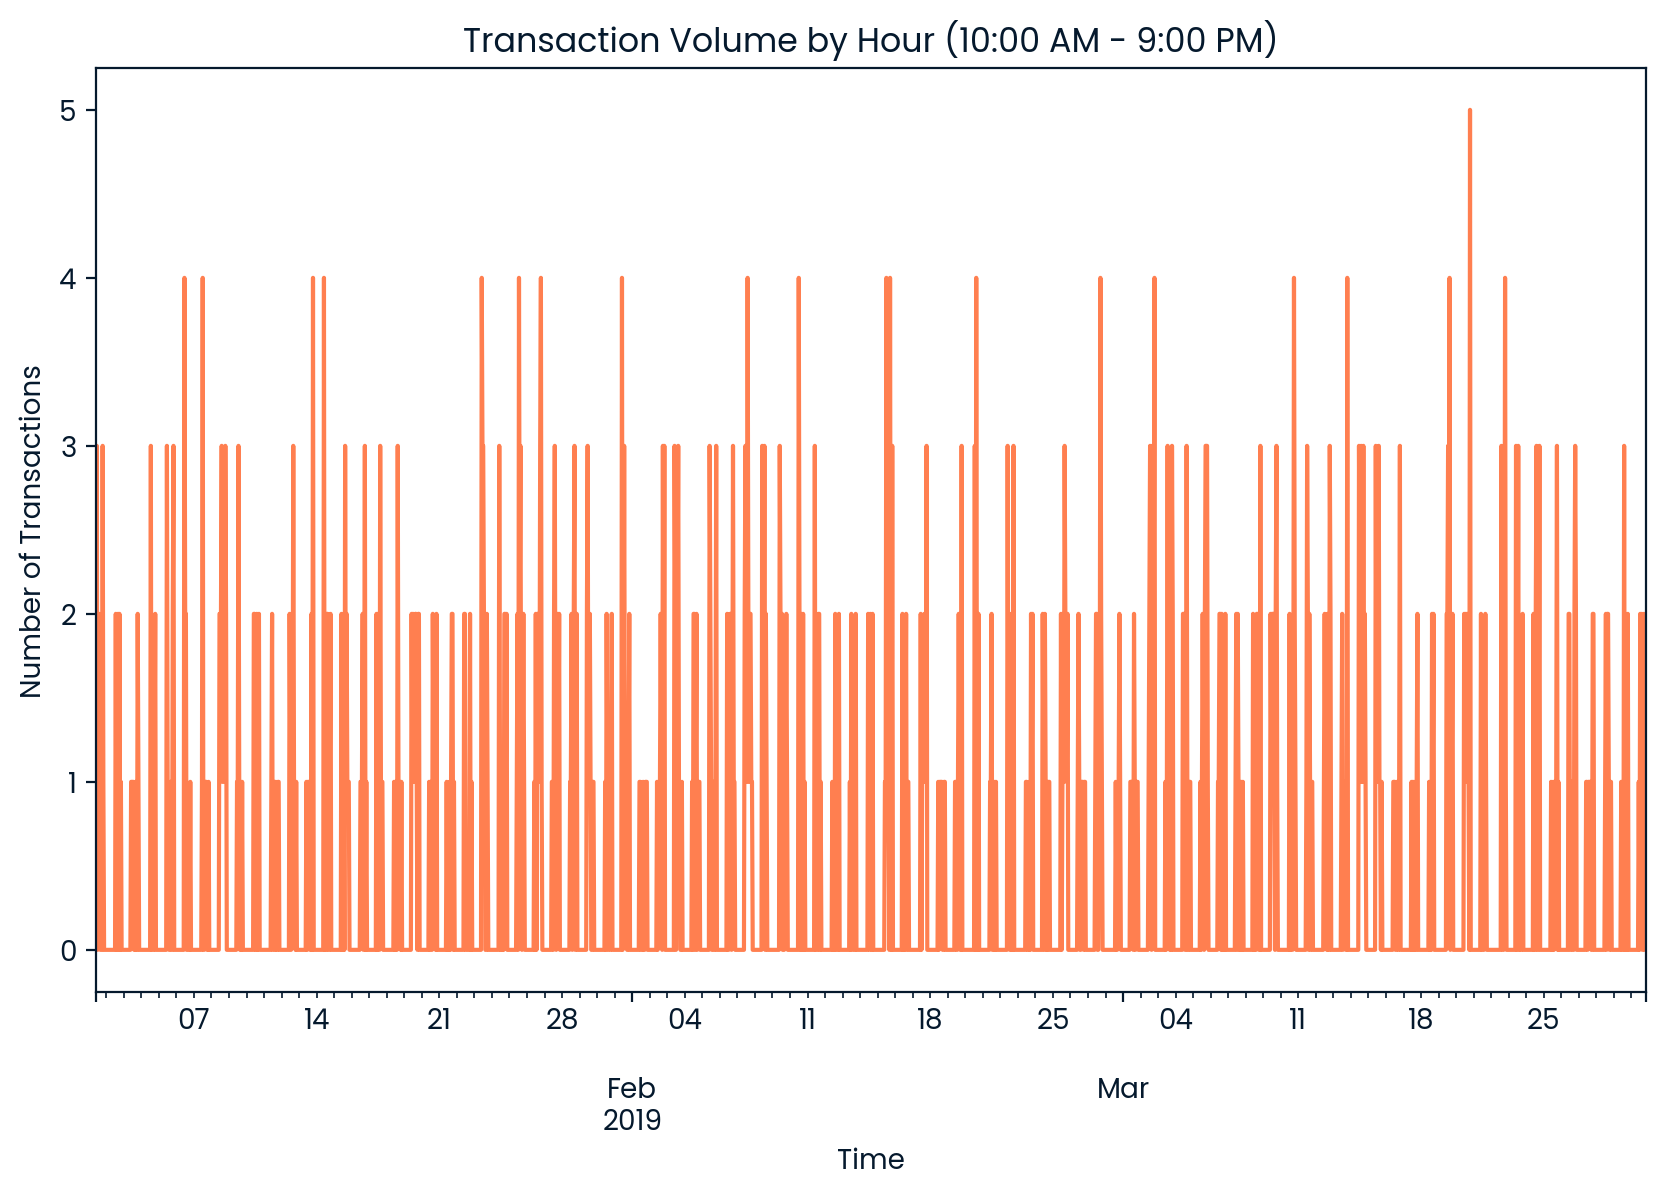

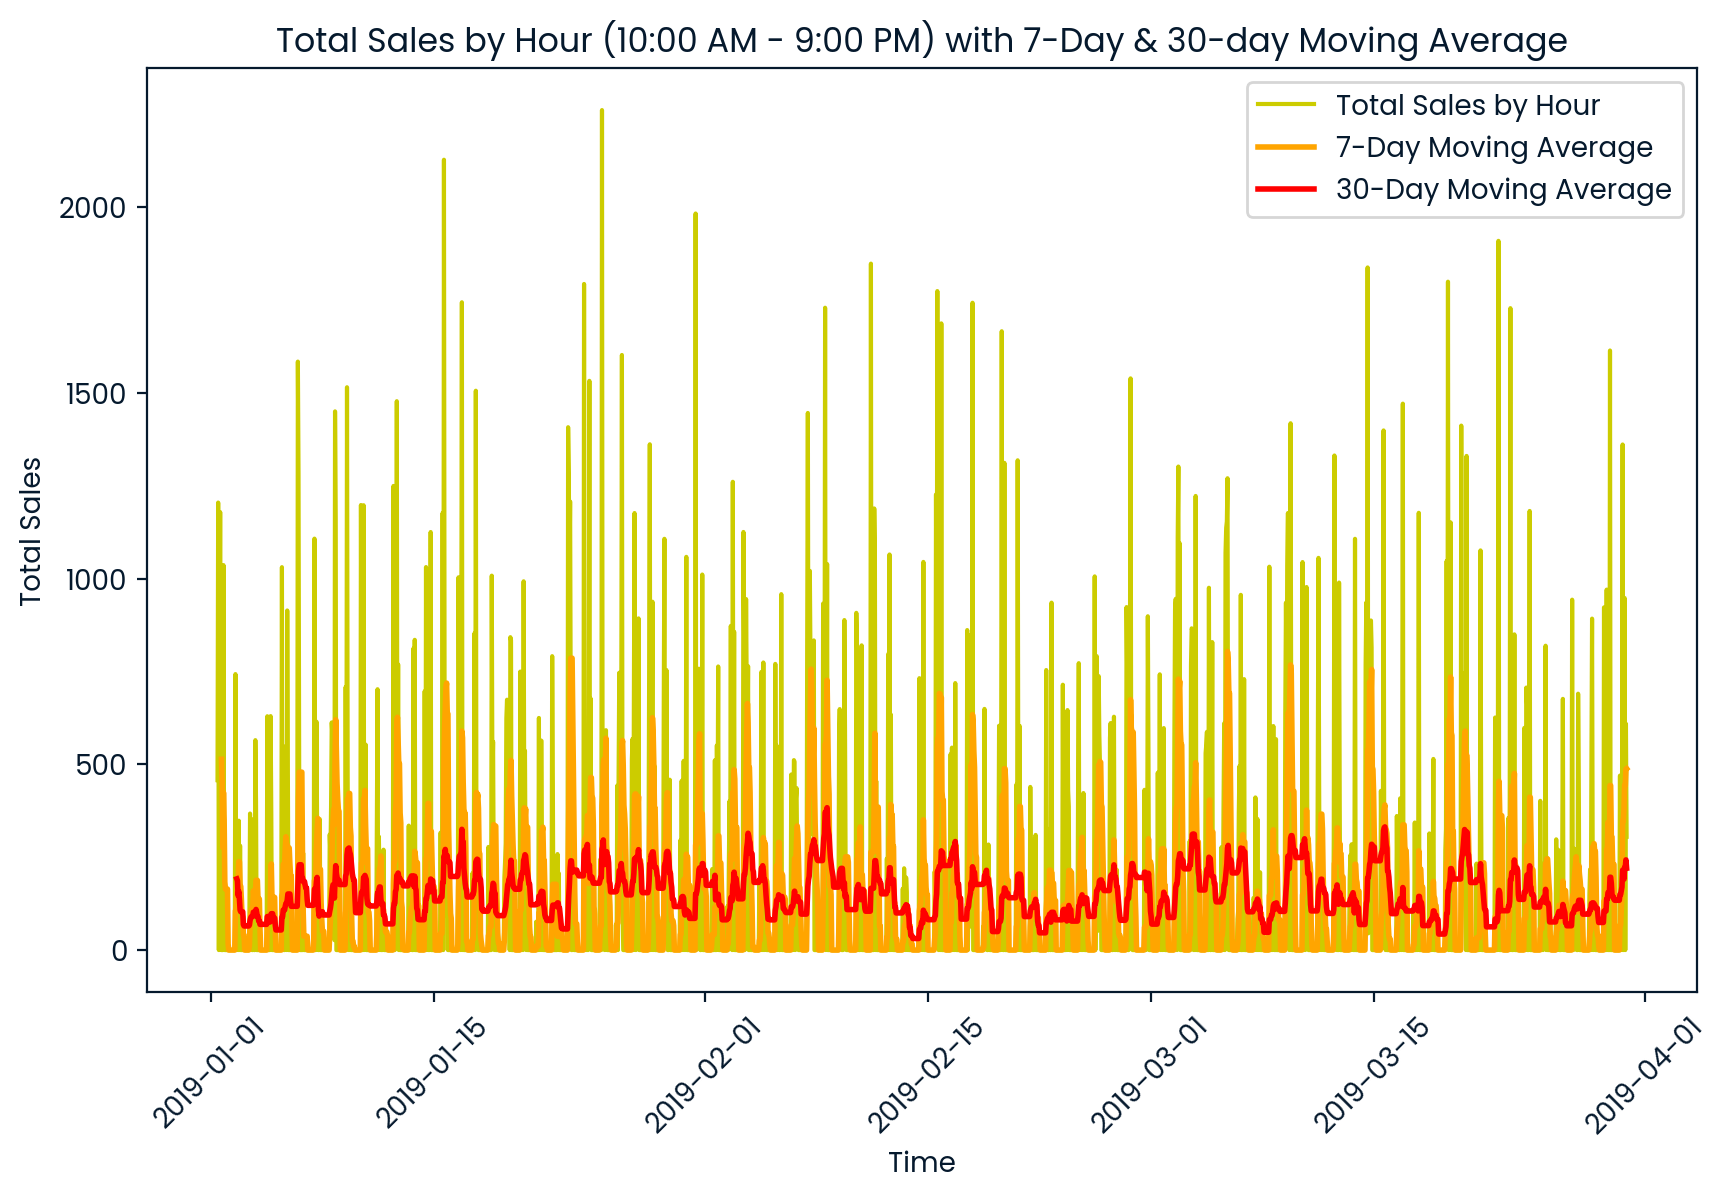

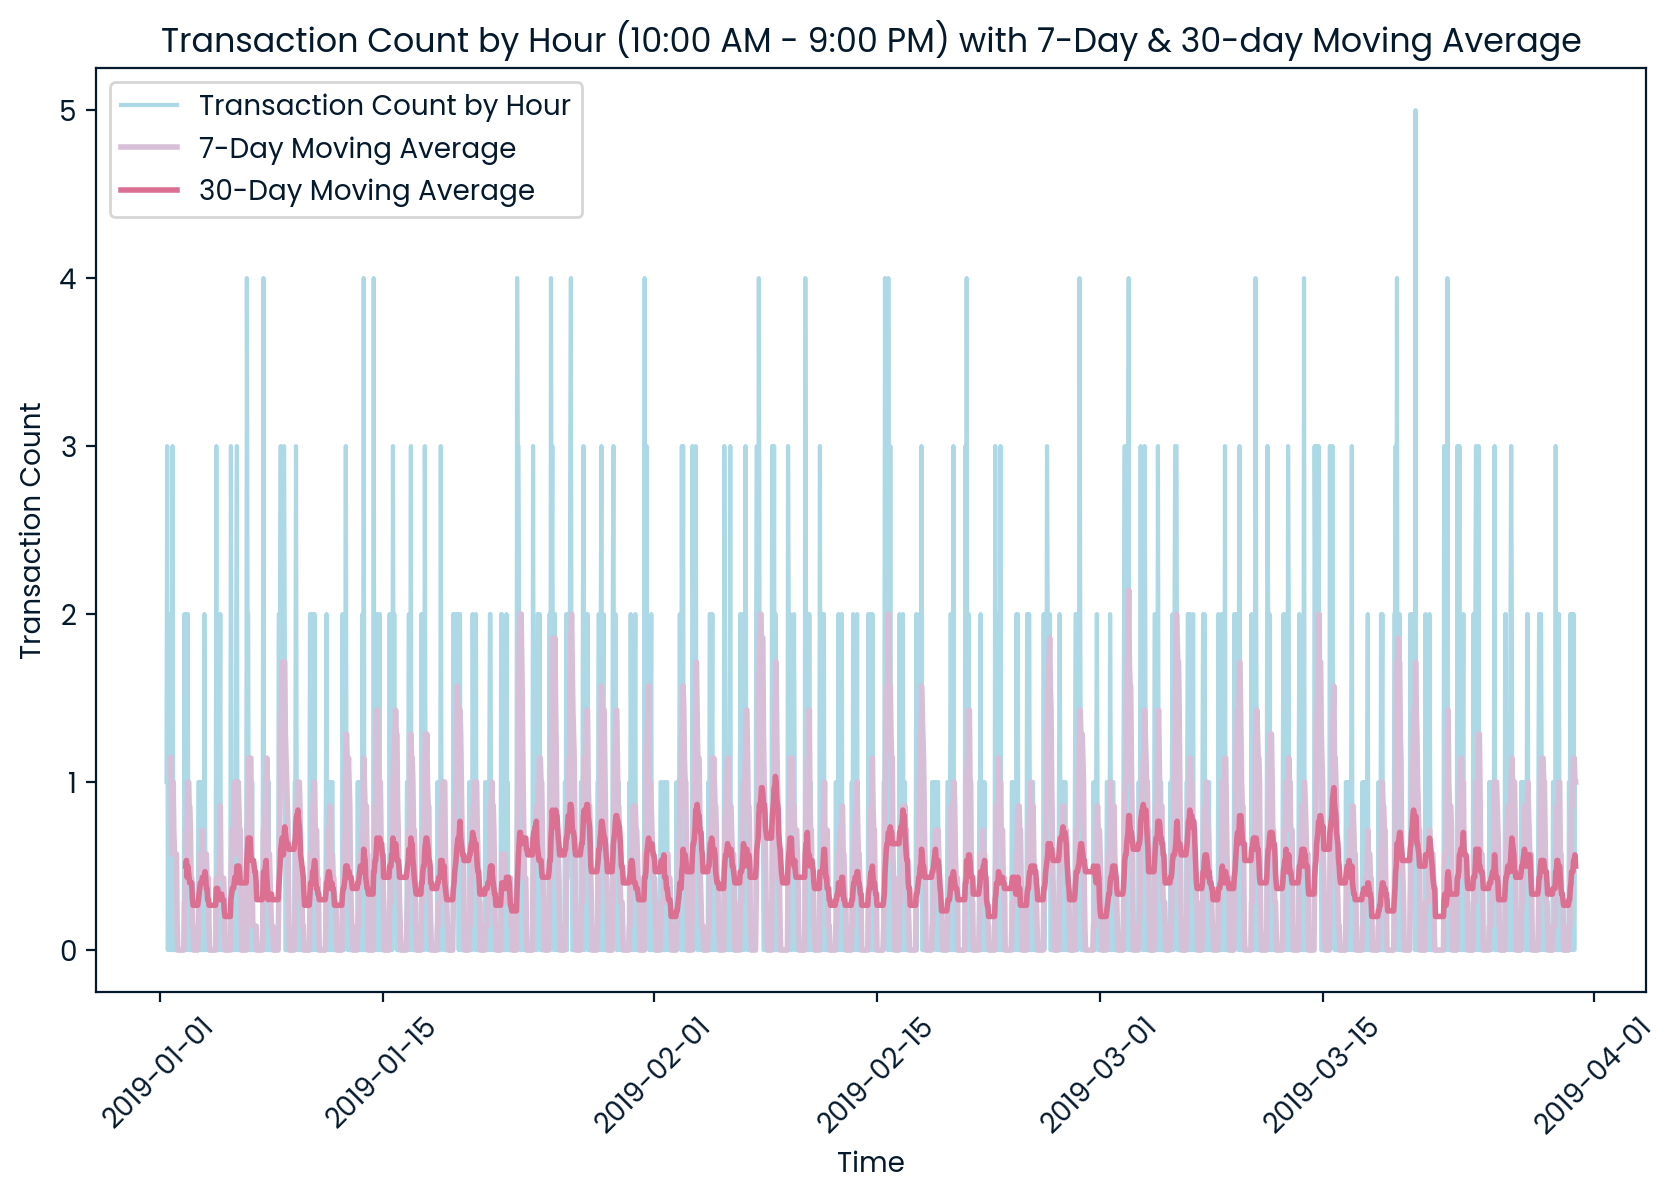

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Read-in
df = pd.read_csv('Walmart Sales Data.csv.csv')

# Identify top-selling product lines
item_count = df.groupby('Product line')['Product line'].value_counts().reset_index(name='Count').sort_values(by='Count', ascending=False)
# Identify top-selling product lines by Gender
gender_item_count = df.groupby(['Product line', 'Gender']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
# Identify gender that spends the greatest sum of money
gender_total_spending = df.groupby('Gender')['Total'].sum().reset_index(name='Total Spending').sort_values(by='Total Spending', ascending=False)
# Identity branch the with highest sales & highest average rating per branch
highest_selling_branches = df.groupby('Branch')['Total'].sum().reset_index(name='Total Sales').sort_values(by='Total Sales', ascending=False)
best_rated_branches = df.groupby('Branch')['Rating'].mean().reset_index(name='Average Rating').sort_values(by='Average Rating', ascending=False)

# Reset indexes
item_count_reset = item_count.reset_index(drop=True)
gender_item_count_reset = gender_item_count.reset_index(drop=True)
gender_total_spending_reset = gender_total_spending.reset_index(drop=True)
highest_selling_branches_reset = highest_selling_branches.reset_index(drop=True)
best_rated_branches_reset = best_rated_branches.reset_index(drop=True)

# Generate report
print("Top Selling Product Lines")
print(item_count_reset) 
print("\n")
print("Top Selling Product Lines by Gender")
print(gender_item_count_reset)
print("\n")
print("Highest Spending by Gender")
print(gender_total_spending_reset)
print("\n")
print("Highest Sales per Branch")
print(highest_selling_branches_reset)
print("\n")
print("Average Rating per Branch")
print(best_rated_branches_reset)


# Analyzing sales trends over time (Total Sales Amount, Average Sales & Transaction Volume)

# Converting Date column to Datetime format
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('Datetime', inplace=True)

# Resample by hour interval to get total sales per hour interval
total_sales_H = df['Total'].resample('H').sum()

# Plot total sales by hour interval
plt.figure(figsize=(10, 6))
total_sales_H.plot(kind='line', color='skyblue')
plt.title('Total Sales by Hour (10:00 AM - 9:00 PM)')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

# Calculate average sales per hour interval (Range between 10:00 AM and 9:00 PM)
avg_sales_H = df['Total'].resample('H').mean()
avg_sales_H = avg_sales_H.between_time('10:00', '21:00')

# Plot average sales by hour interval
plt.figure(figsize=(10, 6))
avg_sales_H.plot(kind='line', color='green')
plt.title('Average Sales by Hour (10:00 AM - 9:00 PM)')
plt.xlabel('Time')
plt.ylabel('Average Sales Amount')
plt.ylim(min(avg_sales_H) * 0.95, max(avg_sales_H) * 1.05)
plt.xticks(rotation=0)
plt.show()

# Resample by hour interval to get frequency of transactions per hour interval
transaction_count_H = df.resample('H').size()

# Plot transaction count per hour
plt.figure(figsize=(10, 6))
transaction_count_H.plot(kind='line', color='coral')
plt.title('Transaction Volume by Hour (10:00 AM - 9:00 PM)')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

# Running 7 and 30 day moving averages on the hourly intervals for total sales, and transaction count to smooth out fluctuations and get a clearer view of trends
total_sales_H_7_day_MA = total_sales_H.rolling(window=7).mean()
total_sales_H_30_day_MA = total_sales_H.rolling(window=30).mean()
transaction_count_H_7_day_MA = transaction_count_H.rolling(window=7).mean()
transaction_count_H_30_day_MA = transaction_count_H.rolling(window=30).mean()

# Plot 7 day & 30 day moving average over original graphs for total sales and transaction count
plt.figure(figsize=(10, 6))
plt.plot(total_sales_H.index, total_sales_H, label='Total Sales by Hour', color='#CCCC00')
plt.plot(total_sales_H.index, total_sales_H_7_day_MA, label='7-Day Moving Average', color='orange', linewidth=2)
plt.plot(total_sales_H.index, total_sales_H_30_day_MA, label='30-Day Moving Average', color='red', linewidth=2)
plt.title('Total Sales by Hour (10:00 AM - 9:00 PM) with 7-Day & 30-day Moving Average')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot 7 day & 30 day moving average for transaction count 
plt.figure(figsize=(10, 6))
plt.plot(transaction_count_H.index, transaction_count_H, label='Transaction Count by Hour', color='#ADD8E6')
plt.plot(transaction_count_H.index, transaction_count_H_7_day_MA, label='7-Day Moving Average', color='#D8BFD8', linewidth=2)
plt.plot(transaction_count_H.index, transaction_count_H_30_day_MA, label='30-Day Moving Average', color='#DB7093', linewidth=2)
plt.title('Transaction Count by Hour (10:00 AM - 9:00 PM) with 7-Day & 30-day Moving Average')
plt.xlabel('Time')
plt.ylabel('Transaction Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()
